# IV: Brute-force diode parameter extraction

In [1]:
from pvops.iv import simulator, extractor

## Step 1: Collect your IV curves. 

In this case, we simulate some curves, but you can replace this step by reading in your own data, if wanted.

In [2]:
sim = simulator.Simulator(
                mod_specs = {
                            'Jinko_Solar_Co___Ltd_JKM270PP_60': {'ncols': 6,
                                                                    'nsubstrings': 3
                                                                }
                            }
)

sim.build_strings({'Unstressed': ['pristine']*12})

N = 100
dicts = {'E':       {'mean': 800,
                        'std': 500,
                        'low': 400,
                        'upp': 1100
                    },
         'Tc':      {'mean': 30,
                      'std': 5,
                    },
         'Rs_mult': {'mean': 1.3,
                    'std': 0.6,
                    'low': 0.9,
                    'upp': 1.5
                    },
         'Rsh_mult': {'mean': 0.8,
                    'std': 0.9,
                    'low': 0.3,
                    'upp': 1.0
                    },
        'Il_mult': {'mean': 1.0,
                    'std': 0.5,
                    'low': 0.95,
                    'upp': 1.05
                    },
        'Io_mult': {'mean': 1.0,
                    'std': 0.6,
                    'low': 0.85,
                    'upp': 1.1
                    },
        'nnsvth_mult': {'mean': 1.0,
                        'std': 0.5,
                        'low': 0.85,
                        'upp': 1.1
                        }
        }
sim.generate_many_samples('pristine', N, dicts)
sim.simulate()

sim.print_info()

Simulating cells:   0%|          | 0/1 [00:00<?, ?it/s]/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/scipy/optimize/_zeros_py.py:466: RuntimeWarning: some failed to converge after 100 iterations
  warnings.warn(msg, RuntimeWarning)
Adding up other definitions: 100%|██████████| 1/1 [00:00<00:00, 10433.59it/s]

Condition list: (Cell definitions)
	[pristine]: 101 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)

String definitions (Series of modcells)
	[Unstressed]: 101 definition(s)



/home/klbonne/Documents/GitHub/pvOps/pvops/iv/simulator.py:1442: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axs = sns.distplot(
/home/klbonne/Documents/GitHub/pvOps/pvops/iv/simulator.py:1445: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axs = sns.distplot(
/home/klbonne/Documents/GitHub/pvOps/pvops

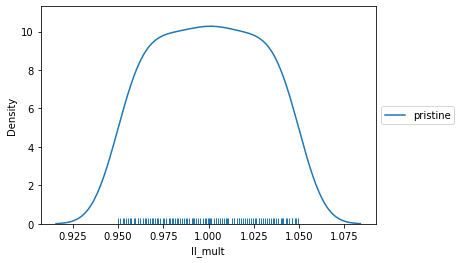

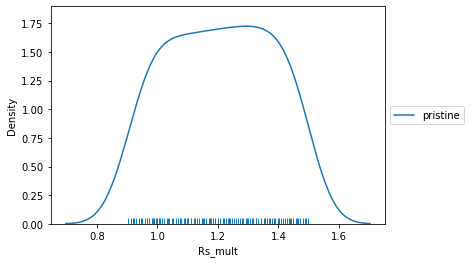

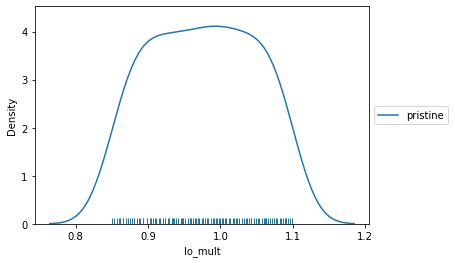

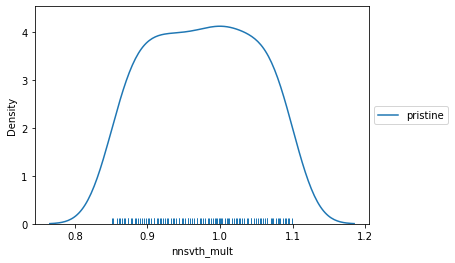

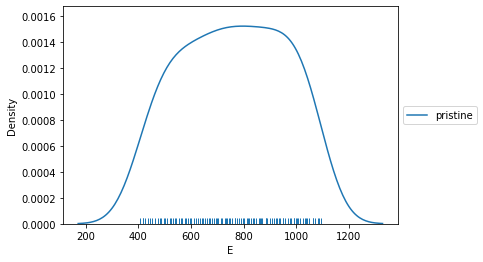

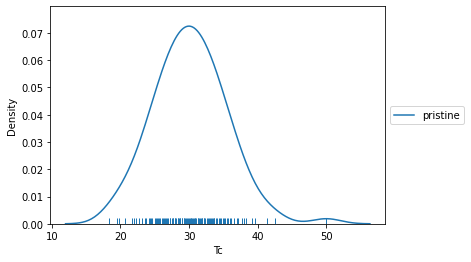

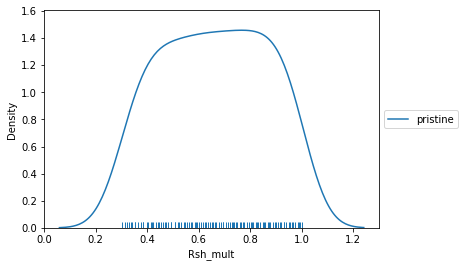

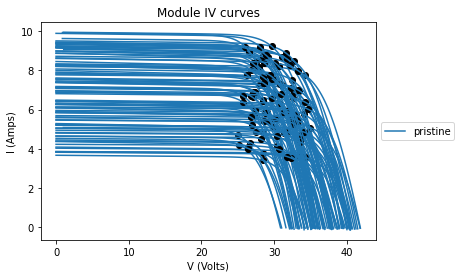

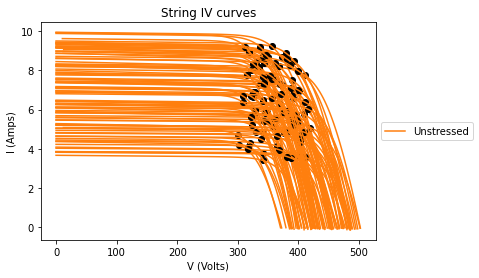

In [3]:
sim.visualize()

In [4]:
df = sim.sims_to_df(focus=['string'], cutoff=True)
df.head()

,current,voltage,E,T,mode,level
0,"[9.214203000284689, 9.210691359222285, 9.20726...","[3.834932371660216e-12, 11.207809937682319, 22...",1000.000000,50.000000,Unstressed,string
1,"[5.284107412718183, 5.2776846348732525, 5.2714...","[3.836930773104541e-12, 10.94261122291978, 21....",587.317020,30.336647,Unstressed,string
2,"[7.125172224252341, 7.119234129879513, 7.11343...","[3.838707129943941e-12, 12.742973777314244, 25...",775.239408,35.517139,Unstressed,string
3,"[6.431353183119788, 6.424342644781958, 6.41749...","[3.834932371660216e-12, 12.216345601755854, 24...",732.303708,35.722979,Unstressed,string
4,"[9.322058378622014, 9.31619129152217, 9.310464...","[3.835043393962678e-12, 11.380842316022822, 22...",1025.459067,31.791829,Unstressed,string


## Step 2: Conduct diode parameter extraction

In [5]:
# Only created to retrieve cell_parameters
temporary_sim = simulator.Simulator(
                mod_specs = {
                            'Jinko_Solar_Co___Ltd_JKM270PP_60': {'ncols': 6,
                                                                    'nsubstrings': 3
                                                                }
                            }
)

extr = extractor.BruteForceExtractor(input_df=df, 
                              current_col='current',
                              voltage_col='voltage',
                              irradiance_col='E',
                              temperature_col='T',
                              T_type='cell',
                              windspeed_col=None,
                              Simulator_mod_specs=None,
                              Simulator_pristine_condition=None)

![Example: Performance of BruteForceExtractor for estimating diode parameters off many input curves](assets/diode_param_extractor.png)
